In [20]:
#importing necessary libraries
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train_data_generator=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range= 0.2, horizontal_flip=True)
valid_data_generator=ImageDataGenerator(rescale=1./255)

train_set=train_data_generator.flow_from_directory('/content/drive/MyDrive/Dataset (1)/Dataset/Train', target_size=(224,224), batch_size=32, class_mode='categorical')
valid_set=valid_data_generator.flow_from_directory('/content/drive/MyDrive/Dataset (1)/Dataset/Test', target_size=(224,224), batch_size=32, class_mode='categorical')

print(len(train_set))
print(len(valid_set))

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.
13
5


In [3]:
#VGG19 model
model=Sequential()
model.add(VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.layers[0].trainable=False
model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 50178     
Total params: 20,074,562
Trainable params: 50,178
Non-trainable params: 20,024,384
_________________________________________________________________


In [4]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
#Training the model
M=model.fit_generator(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=13, validation_steps=5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
13/13 [==============================] - 244s 18s/step - loss: 1.1489 - accuracy: 0.5457 - val_loss: 1.5205 - val_accuracy: 0.3582
Epoch 2/30
13/13 [==============================] - 6s 465ms/step - loss: 0.6429 - accuracy: 0.6708 - val_loss: 0.5032 - val_accuracy: 0.7015
Epoch 3/30
13/13 [==============================] - 6s 462ms/step - loss: 0.4365 - accuracy: 0.7972 - val_loss: 0.5631 - val_accuracy: 0.7090
Epoch 4/30
13/13 [==============================] - 6s 467ms/step - loss: 0.3299 - accuracy: 0.8617 - val_loss: 0.4301 - val_accuracy: 0.8060
Epoch 5/30
13/13 [==============================] - 6s 466ms/step - loss: 0.3012 - accuracy: 0.8554 - val_loss: 0.3633 - val_accuracy: 0.8134
Epoch 6/30
13/13 [==============================] - 6s 463ms/step - loss: 0.2723 - accuracy: 0.8961 - val_loss: 0.4580 - val_accuracy: 0.7687
Epoch 7/30
13/13 [==============================] - 6s 462ms/step - loss: 0.2725 - accuracy: 0.9020 - val_loss: 0.3797 - val_accuracy: 0.8209
Epoch 

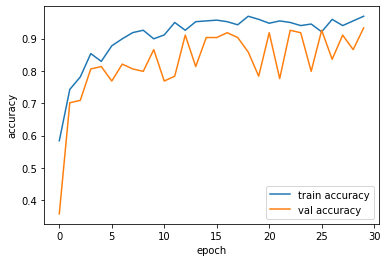

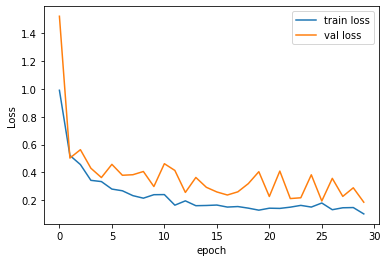

In [42]:
#plotting the accracy
plt.plot(M.history['accuracy'], label='train accuracy')
plt.plot(M.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#plotting the loss
plt.plot(M.history['loss'], label='train loss')
plt.plot(M.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
#score
score=model.evaluate_generator(valid_set,steps=5)

print('loss : {}'.format(score[0]))
print('accuracy : {}'.format(score[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss : 0.18640072643756866
accuracy : 0.9328358173370361


In [36]:
#CNN model
CNN_model=Sequential()
CNN_model.add(Conv2D(input_shape=(224,224,3), filters=16, kernel_size=2, padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(1024, activation='relu'))
CNN_model.add(Dense(2,activation='softmax'))
CNN_model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 50176)           

In [37]:
#compile the model
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
#training the model
C=CNN_model.fit_generator(train_set, validation_data=valid_set, epochs= 30, steps_per_epoch=13, validation_steps=5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
13/13 [==============================] - 6s 404ms/step - loss: 3.8573 - accuracy: 0.4938 - val_loss: 0.6455 - val_accuracy: 0.6791
Epoch 2/30
13/13 [==============================] - 5s 380ms/step - loss: 0.7232 - accuracy: 0.5478 - val_loss: 0.7005 - val_accuracy: 0.4925
Epoch 3/30
13/13 [==============================] - 5s 382ms/step - loss: 0.6252 - accuracy: 0.6451 - val_loss: 0.6224 - val_accuracy: 0.6866
Epoch 4/30
13/13 [==============================] - 5s 383ms/step - loss: 0.5471 - accuracy: 0.6560 - val_loss: 1.1225 - val_accuracy: 0.2985
Epoch 5/30
13/13 [==============================] - 5s 386ms/step - loss: 0.4935 - accuracy: 0.7588 - val_loss: 0.7757 - val_accuracy: 0.4030
Epoch 6/30
13/13 [==============================] - 5s 383ms/step - loss: 0.4362 - accuracy: 0.8169 - val_loss: 0.7541 - val_accuracy: 0.4478
Epoch 7/30
13/13 [==============================] - 5s 384ms/step - loss: 0.3938 - accuracy: 0.8154 - val_loss: 0.9385 - val_accuracy: 0.4701
Epoch 

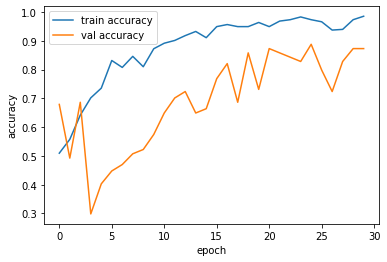

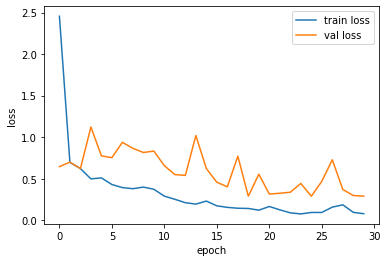

In [39]:
#plotting accuracy
plt.plot(C.history['accuracy'], label='train accuracy')
plt.plot(C.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#plotting loss
plt.plot(C.history['loss'], label='train loss')
plt.plot(C.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [41]:
#evaluating the model
CNN_score=CNN_model.evaluate_generator(valid_set,steps=5)

print('loss : {}'.format(CNN_score[0]))
print('accuracy : {}'.format(CNN_score[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss : 0.2911232113838196
accuracy : 0.8731343150138855
